In [ ]:
##################################################################
# Authores: Diana Lorena Mancera Zapata - Dr. Fernando Arce Vega #
# Date:     10/05/2021                                           #
# Subject:  Pattern classification / bacterial vaginosis         #
##################################################################

In [ ]:
# Libraries
import xlrd
import numpy as np
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import metrics
from scipy.io import savemat
from google.colab import output
import time
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from sklearn.metrics import f1_score
from sklearn import metrics

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Normalizing data
def normalizing_data(train_patts, test_patts, norm_type):

  # Statistics normalization
  if norm_type == 'statistics':

    avg = np.mean(train_patts, axis = 0)
    std = np.std(train_patts, axis = 0)

    train_patts -= avg
    train_patts /= std

    test_patts -= avg
    test_patts /= std

  # min - max normalization
  elif norm_type == 'min_max':

    mini = np.min(train_patts, axis = 0)
    maxi = np.max(train_patts, axis = 0)

    train_patts = (train_patts - mini) / (maxi - mini)

    test_patts = (test_patts - mini) / (maxi - mini)


  return avg, std, train_patts, test_patts
  # return mini, maxi, train_patts, test_patts

In [ ]:
# Nets
def build_model(num_features):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences = True, activation = 'tanh', input_shape = (1, num_features))),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences=True, activation = 'tanh')),
      # tf.keras.layers.LSTM(30, return_sequences = True, input_shape = (1, num_features)),
      # tf.keras.layers.LSTM(30),
      # tf.keras.layers.LSTM(20, activation = 'tanh'),
      #tf.keras.layers.LSTM(30, return_sequences = True, activation = 'tanh', input_shape = (1, num_features)),
      #tf.keras.layers.LSTM(30, activation = 'tanh'),
      #Entradatf.keras.layers.Conv1D(filters = 20, activation = 'tanh', kernel_size=3, padding="same", input_shape = (1, num_features)), # 64
      #Capa oculta tf.keras.layers.Conv1D(filters = 20, activation = 'tanh', kernel_size=3, padding="same"),  # tanh
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.ReLU(),
      # tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Dropout(0.2),
      #tf.keras.layers.Dense(30, activation = 'relu'), # relu
      # tf.keras.layers.Dropout(0.3),
      # tf.keras.layers.Dense(10, activation = 'relu', input_shape = (1, num_features)), # relu
      # tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(20, activation = 'relu'), # relu
      # tf.keras.layers.Dropout(0.1),
      # tf.keras.layers.Dense(30, activation = 'relu'), # relu
      # tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # 0.001
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:
path = '/content/drive/MyDrive/SLD_data.mat'

mat = sio.loadmat(path)
print(mat.keys())

pos_patters = mat["pos_patterns"].astype(np.float32)
pos_labels = mat["pos_labels"]# .squeeze(axis = 0).astype(np.float32)
pos_labels = np.reshape(pos_labels, (54, 1))
# pos_patters = np.expand_dims(pos_patters, axis = 1)


neg_patters = mat["neg_patterns"].astype(np.float32)
neg_labels = mat["neg_labels"] #.squeeze(axis = 0).astype(np.float32)
neg_labels = np.reshape(neg_labels, (108, 1))
#neg_patters = np.expand_dims(neg_patters, axis = 1)

print(np.shape(pos_patters))
print(np.shape(neg_patters))

print(np.shape(pos_labels))
print(np.shape(neg_labels))

dict_keys(['__header__', '__version__', '__globals__', 'pos_patterns', 'neg_patterns', 'pos_labels', 'neg_labels'])
(54, 1, 20)
(108, 1, 20)
(54, 1)
(108, 1)


Fold:  1
1/1 [==============================] - 1s 1s/step


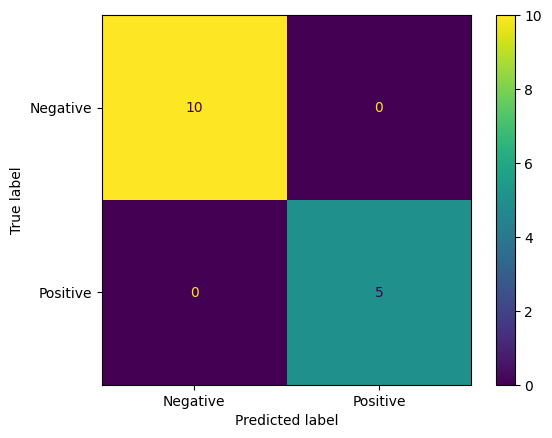

acc in training:  1.0
acc in validation:  1.0
1.0
Fold:  2
1/1 [==============================] - 2s 2s/step


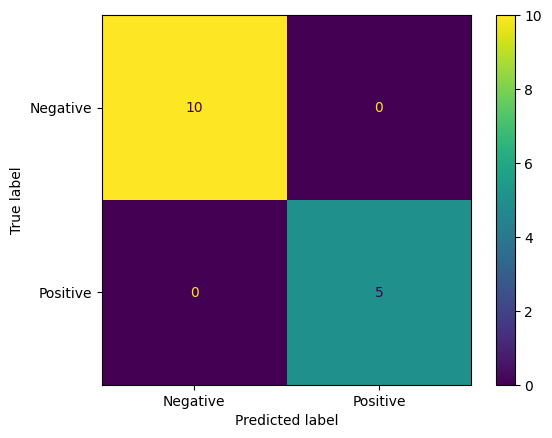

acc in training:  1.0
acc in validation:  1.0
1.0
Fold:  3
1/1 [==============================] - 1s 1s/step


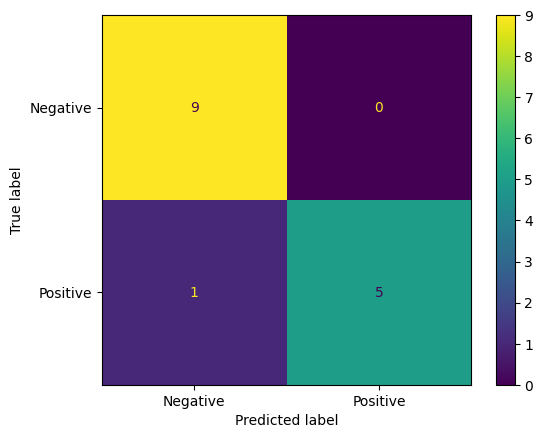

acc in training:  1.0
acc in validation:  0.9333333373069763
0.9090909090909091
Fold:  4
1/1 [==============================] - 1s 1s/step


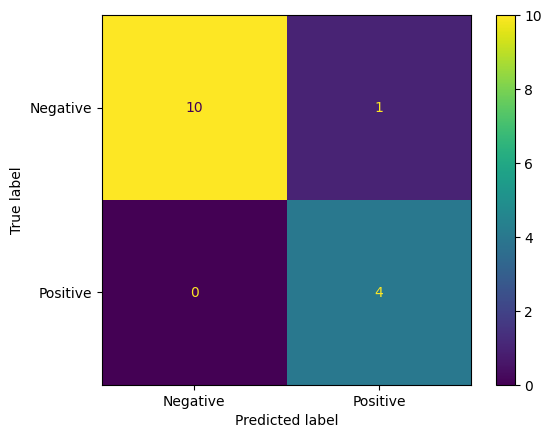

acc in training:  1.0
acc in validation:  0.9333333373069763
0.888888888888889
Fold:  5


1/1 [==============================] - 1s 1s/step


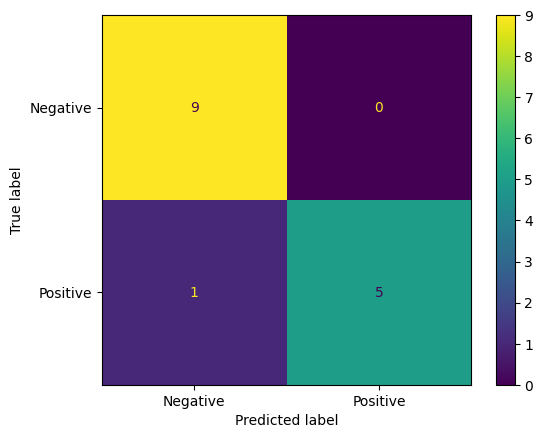

acc in training:  1.0
acc in validation:  0.9333333373069763
0.9090909090909091
Fold:  6


1/1 [==============================] - 1s 1s/step


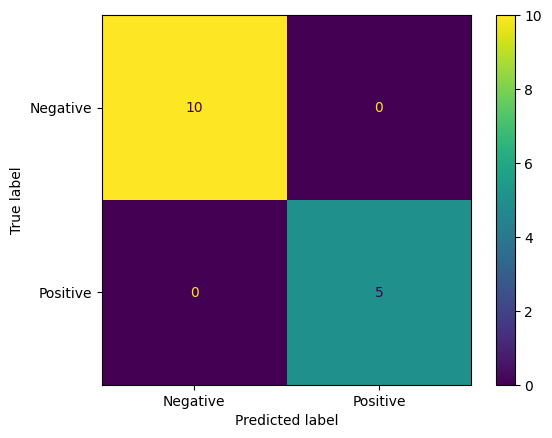

acc in training:  1.0
acc in validation:  1.0
1.0
Fold:  7
1/1 [==============================] - 2s 2s/step


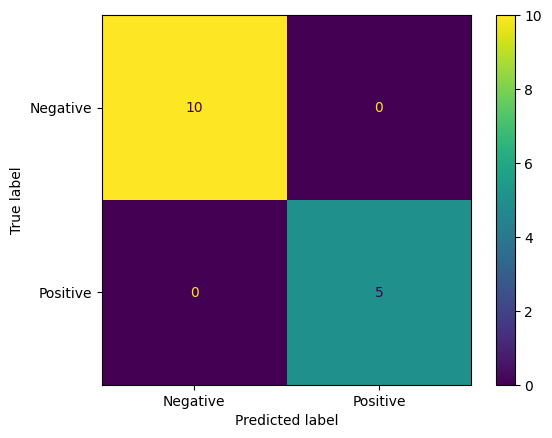

acc in training:  1.0
acc in validation:  1.0
1.0
Fold:  8
1/1 [==============================] - 2s 2s/step


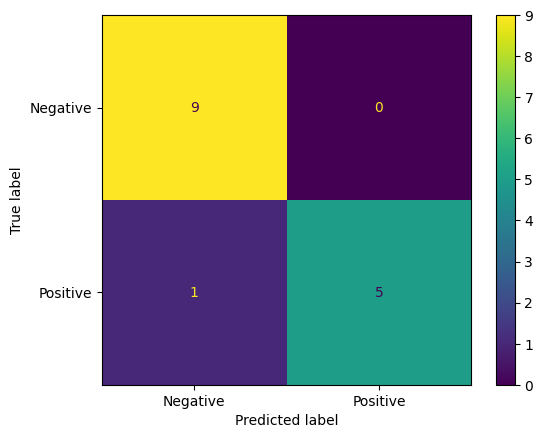

acc in training:  1.0
acc in validation:  0.9333333373069763
0.9090909090909091
Fold:  9
1/1 [==============================] - 1s 1s/step


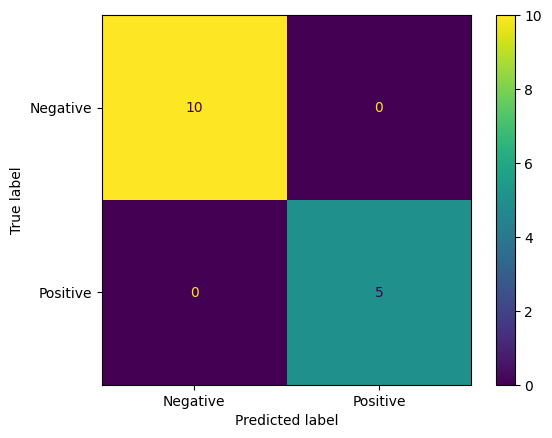

acc in training:  1.0
acc in validation:  1.0
1.0
Fold:  10
1/1 [==============================] - 1s 1s/step


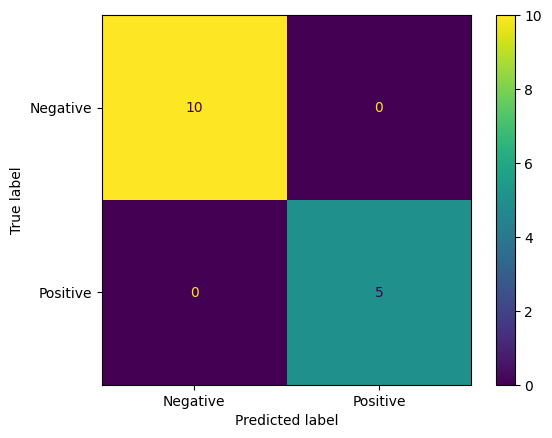

acc in training:  1.0
acc in validation:  1.0
1.0
Mean training acc:     1.0
Mean validation acc:   0.9733333349227905

sensitividad  1.0
Especificidad 1.0
1.0

Mean training loss:    0.00011263156484346837
Mean validation loss:  0.22480397839372018

Mean specificity:    0.97
Mean sensitive:  0.9800000000000001
Mean f1:  0.9616161616161616


In [ ]:
# K - fold validation
loss_training_vec = []
acc_training_vec = []
loss_validation_vec = []
acc_validation_vec = []
sensitive_vec = []
specificity_vec = []
f1score_vec = []
k = 10

num_epochs = 200

pos_val_samples = len(pos_labels) // k
neg_val_samples = len(neg_labels) // k


for i in range(k):
  print('Fold: ', i + 1)

  # Positive validation data
  pos_val_data = pos_patters[i * pos_val_samples: (i + 1) * pos_val_samples]
  pos_val_targets = pos_labels[i * pos_val_samples: (i + 1) * pos_val_samples]

  # Positive training data
  pos_train_data = np.concatenate(
      [pos_patters[:i * pos_val_samples],
      pos_patters[(i + 1) * pos_val_samples:]],
      axis = 0)

  pos_train_targets = np.concatenate(
      [pos_labels[:i * pos_val_samples],
      pos_labels[(i + 1) * pos_val_samples:]],
      axis = 0)

  # Negative validation data
  neg_val_data = neg_patters[i * neg_val_samples: (i + 1) * neg_val_samples]
  neg_val_targets = neg_labels[i * neg_val_samples: (i + 1) * neg_val_samples]

  # Negative training data
  neg_train_data = np.concatenate(
      [neg_patters[:i * neg_val_samples],
      neg_patters[(i + 1) * neg_val_samples:]],
      axis = 0)

  neg_train_targets = np.concatenate(
      [neg_labels[:i * neg_val_samples],
      neg_labels[(i + 1) * neg_val_samples:]],
      axis = 0)

  partial_train_data = np.concatenate([neg_train_data, pos_train_data])
  partial_train_targets = np.concatenate([neg_train_targets, pos_train_targets])

  val_data = np.concatenate([neg_val_data, pos_val_data])
  val_targets = np.concatenate([neg_val_targets, pos_val_targets])

  avg, std, partial_train_data, val_data = normalizing_data(partial_train_data, val_data, "statistics")

  model = build_model(np.shape(pos_patters)[2])

  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs,
            batch_size = 16,
            validation_data = (val_data, val_targets),
            verbose = 0)

  resultados = model.predict(val_data).reshape(np.shape(val_targets))
  resultados = resultados >= 0.5
  f1 = f1_score(val_targets, resultados)

  specificity = specificity_score(val_targets, resultados )
  sensitive = sensitivity_score(val_targets, resultados )
  sensitive_vec.append(sensitive)
  specificity_vec.append(specificity)
  f1score_vec.append(f1)

  confusion_matrix = metrics.confusion_matrix(resultados, val_targets)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative", "Positive"])
  cm_display.plot()
  plt.show()



  loss_training, acc_training = model.evaluate(partial_train_data, partial_train_targets, verbose = 0)
  loss_validation, acc_validation = model.evaluate(val_data, val_targets, verbose = 0)

  loss_training_vec.append(loss_training)
  acc_training_vec.append(acc_training)

  loss_validation_vec.append(loss_validation)
  acc_validation_vec.append(acc_validation)

  print('acc in training: ', acc_training)
  print('acc in validation: ', acc_validation)
  print(f1)


print("Mean training acc:    ", np.mean(acc_training_vec))
print("Mean validation acc:  ", np.mean(acc_validation_vec))
print('')
print('sensitividad ', sensitive)
print('Especificidad',   specificity)
print(f1)
print('')
print("Mean training loss:   ", np.mean(loss_training_vec))
print("Mean validation loss: ", np.mean(loss_validation_vec))
print('')
print("Mean specificity:   ", np.mean(specificity_vec))
print("Mean sensitive: ", np.mean(sensitive_vec))
print("Mean f1: ", np.mean(f1score_vec))